In [1]:
# IGNORE THIS CELL WHICH CUSTOMIZES LAYOUT AND STYLING OF THE NOTEBOOK !
from numpy.random import seed

seed(42)
import tensorflow as tf

tf.random.set_seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
mpl.rcParams["lines.linewidth"] = 3
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config IPCompleter.greedy=True
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=FutureWarning)
from IPython.core.display import HTML

HTML(open("custom.html", "r").read())

# Chapter 8d: Introduction to Neural Networks
## Using pre-defined models in TensorFlow

In [2]:
from tensorflow.keras import applications

help(applications)

Help on package keras.api._v2.keras.applications in keras.api._v2.keras:

NAME
    keras.api._v2.keras.applications - AUTOGENERATED. DO NOT EDIT.

PACKAGE CONTENTS
    convnext (package)
    densenet (package)
    efficientnet (package)
    efficientnet_v2 (package)
    imagenet_utils (package)
    inception_resnet_v2 (package)
    inception_v3 (package)
    mobilenet (package)
    mobilenet_v2 (package)
    mobilenet_v3 (package)
    nasnet (package)
    regnet (package)
    resnet (package)
    resnet50 (package)
    resnet_rs (package)
    resnet_v2 (package)
    vgg16 (package)
    vgg19 (package)
    xception (package)

FILE
    /Users/franziskaoschmann/miniconda3/envs/mlws_arm/lib/python3.10/site-packages/keras/api/_v2/keras/applications/__init__.py




### ImageNet 
[ImageNet](http://image-net.org/) is a very large (> 14 million!! images) and easily accessible image database. More than 14 million annotated images indicating the object in the image and more than 1 million images with bounding box information.

Summary and statistics: http://image-net.org/about-stats


In [3]:
from tensorflow.keras.applications import VGG16

In [4]:
?VGG16

Signature:
VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax',
)
Docstring:
Instantiates the VGG16 model.

Reference:
- [Very Deep Convolutional Networks for Large-Scale Image Recognition](
https://arxiv.org/abs/1409.1556) (ICLR 2015)

For image classification use cases, see
[this page for detailed examples](
  https://keras.io/api/applications/#usage-examples-for-image-classification-models).

For transfer learning use cases, make sure to read the
[guide to transfer learning & fine-tuning](
  https://keras.io/guides/transfer_learning/).

The default input size for this model is 224x224.

Note: each Keras Application expects a specific kind of input preprocessing.
For VGG16, call `tf.keras.applications.vgg16.preprocess_input` on your
inputs before passing them to the model.
`vgg16.preprocess_input` will convert the input images from RGB to BGR,
then will zero-center ea

In [5]:
model = VGG16(weights="imagenet")

2024-03-14 13:42:45.630907: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-03-14 13:42:45.630929: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-03-14 13:42:45.630936: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-03-14 13:42:45.631005: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-14 13:42:45.631038: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

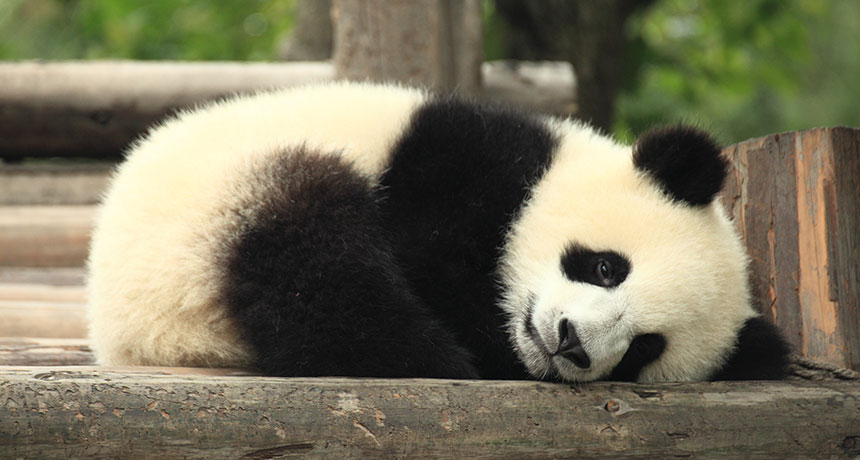

source: GEORGE LU/FLICKR (CC BY 2.0)


In [7]:
from IPython.display import Image as Img
from IPython.display import TextDisplayObject as text

display(Img(filename="./images/mr_panda_free.jpg", width=600))
print(text("source: GEORGE LU/FLICKR (CC BY 2.0)").data)

In [8]:
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img

image = load_img("./images/mr_panda_free.jpg", target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# Prepare data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
# prediction of probability of belonging to the output classes
prediction = model.predict(image)
# converting the probabilities to class labels
label = decode_predictions(prediction)
# Top 5 classes
label = label[0]
for pred in label:
    # print the classification
    print("It is: {} with probability {:.4f}%".format(pred[1], pred[2] * 100))

2024-03-14 13:42:47.853212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 412ms/step
It is: giant_panda with probability 100.0000%
It is: skunk with probability 0.0000%
It is: badger with probability 0.0000%
It is: toilet_tissue with probability 0.0000%
It is: Angora with probability 0.0000%


## Transfering knowledge

Recap: Convolutional Neural Networks can be seen as being comprised of 2 parts:
**A feature extractor (convolution , Maxpooling layers) and a classifier part (Dense layers)**

Different possibilities to work with pre-trained/pre-existing models trained on a very large datasets such as Imagenet:

* Freezing the convolution part and throwing away the classifer part. Adding your own dense layers and training them.
* Freezing only some layers in the convolution part and throwing away the classifer part. Adding your own dense layers and training the unfreezed and the dense layers.
* Only using the architecture and training the whole network again.

## Realistic example

### Histopathological Cancer Detection

https://www.kaggle.com/c/histopathologic-cancer-detection/overview

**Download data**: https://www.kaggle.com/competitions/histopathologic-cancer-detection/data

Identification of metastatic cancer in small image patches taken from larger digital pathology scans.

FileNotFoundError: [Errno 2] No such file or directory: '/cluster/project/workshops/machine_learning/machinelearning-introduction-workshop/data/histopathologic_cancer_detection/train/benign'

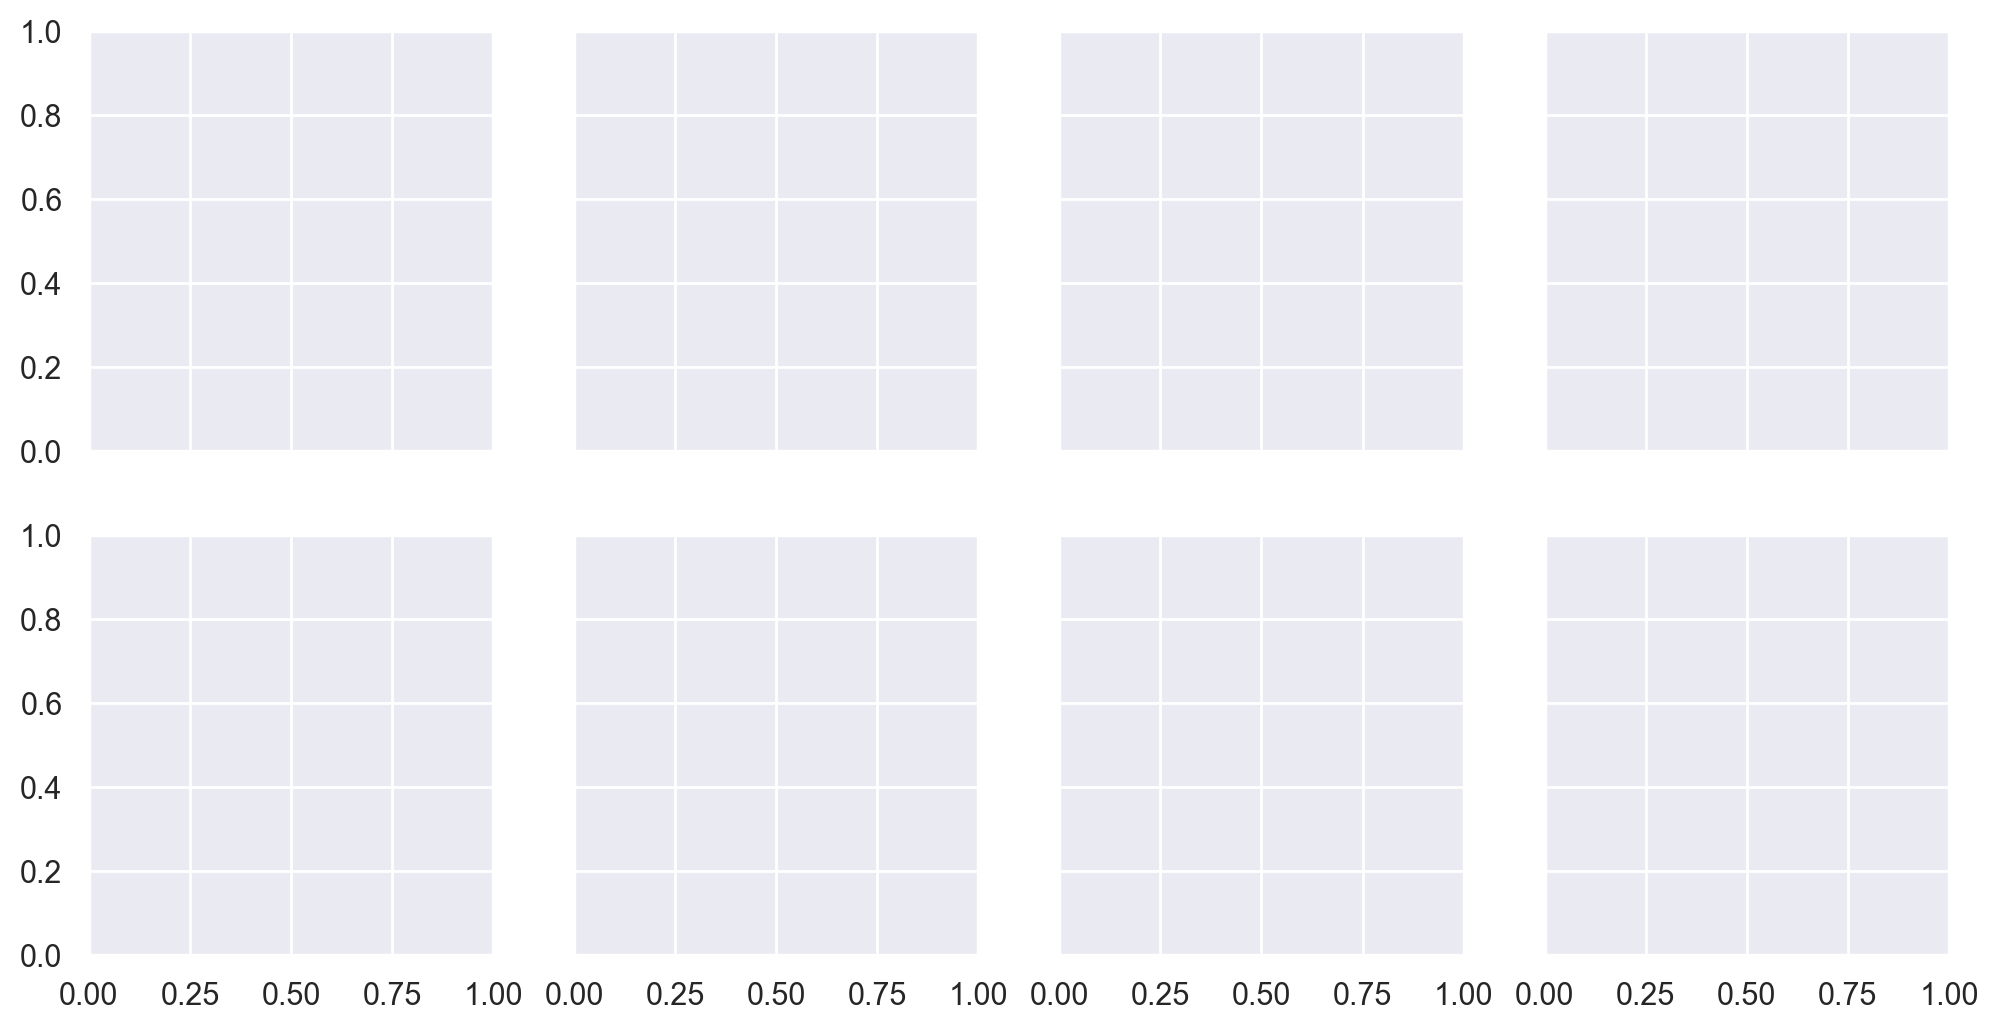

In [9]:
%matplotlib inline
# Plotting a few images from this dataset
import os

import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from PIL import Image

random.seed(42)
import tensorflow as tf

tf.random.set_seed(42)


def plot_data(samples, top_dir):
    sub_directories = ["benign", "malign"]
    fig, ax = plt.subplots(
        len(sub_directories),
        samples,
        sharex=True,
        sharey=True,
        figsize=(3 * samples, 3 * len(sub_directories)),
    )
    labels = ["0", "1"]
    assert len(sub_directories) == 2
    for i in range(samples):
        for j, k in enumerate(sub_directories):
            tmp = os.path.join(top_dir, k)
            tmp_img = Image.open(os.path.join(tmp, random.choice(os.listdir(tmp))))
            ax[j, i].imshow(np.asarray(tmp_img))
            ax[j, i].set_title("{}: label={}".format(k, j))
            ax[j, i].grid(False)


#data_dir = "PATH_TO_histopathologic_cancer_detection_FOLDER"
data_dir = "/cluster/project/workshops/machine_learning/machinelearning-introduction-workshop/data/histopathologic_cancer_detection/"
plot_data(4, os.path.join(data_dir, "train"))

In [ ]:
# Data preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale=1 / 255.0)

train_directory = os.path.join(data_dir, "train")
train_data_generator = train_data.flow_from_directory(
    train_directory, target_size=(96, 96), batch_size=256, class_mode="binary"
)

validation_data = ImageDataGenerator(rescale=1 / 255.0)
validation_directory = os.path.join(data_dir, "validation")
validation_data_generator = validation_data.flow_from_directory(
    validation_directory, target_size=(96, 96), batch_size=256, class_mode="binary"
)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
feature_extractor = VGG16(weights=None, include_top=False, input_shape=(96, 96, 3))
# feature_extractor = MobileNetV2(weights=None, include_top=False, input_shape=(96,96,3))
feature_extractor.summary()

In [ ]:
model = models.Sequential()
model.add(feature_extractor)
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

In [ ]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.0001),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [ ]:
num_epochs = 10
reduce_lr = ReduceLROnPlateau(
    monitor="val_loss", factor=0.2, patience=2, min_lr=0.000001
)
mcp_save = ModelCheckpoint("./test/", save_freq="epoch")

In [ ]:
# CPU times: user 1h 21min 11s, sys: 17min 41s, total: 1h 38min 53s
# Wall time: 1h 58min 20s wo dropout
model_run = model.fit(
    train_data_generator,
    steps_per_epoch=len(train_data_generator),
    epochs=num_epochs,
    validation_data=validation_data_generator,
    validation_steps=len(validation_data_generator),
    callbacks=[reduce_lr, mcp_save],
)

In [ ]:
import pickle
# with open("./data/histopathology_run_history", "wb") as filehandler:
#    pickle.dump(model_run.history, filehandler)

In [ ]:
history_file = open("./data/histopathology_run_history", "rb")
history = pickle.load(history_file)
num_epochs = 10
plt.plot(
    np.arange(0, num_epochs),
    history["val_accuracy"],
    label="Validation accuracy",
)
plt.plot(np.arange(0, num_epochs), history["accuracy"], label="Train accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.ylim([0.6, 1])
plt.grid()

In [ ]:
# Data Augmentation
train_data = ImageDataGenerator(
    rescale=1 / 255.0,
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
)
# Visualizing what our data generator is doing
# Choosing an image randomly
from numpy import random

pic_malignant = np.asarray(
    Image.open(
        train_directory
        + "/malign/"
        + random.choice(os.listdir(train_directory + "/malign/"))
    )
)
fig, ax = plt.subplots(1, 8, sharex=True, sharey=True, figsize=(3 * 8, 3))
ax = ax.flatten()
ax[0].imshow(pic_malignant)
ax[0].grid(False)
pic_malignant = pic_malignant[np.newaxis, :]
for i, img in enumerate(train_data.flow(pic_malignant)):
    ax[i + 1].imshow(img[0])
    ax[i + 1].grid(False)
    if i == 6:
        break

## TensorFlow Hub

A great repository of trained machine learning models!

The models can be downloaded and used with just a few lines of code.

Find models here: https://tfhub.dev/

In [ ]:
import tensorflow_hub as hub

In [ ]:
layer = hub.KerasLayer(
    "https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4", trainable=True
)

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential([layer])
model.build([None, 224, 224, 3])
model.summary()